# Three-dimensional Black-Oil Reservoir Simulation Problem 

## Purpose
This notebook serves multiple objectives:
1. Define the parameters for our reservoir model.
2. Organize and save these parameters in a compatible format for the Open Porous Media Reservoir Simulator (OPM).
3. Execute the simulation.
4. Analyze and visualize the computed results.

## Background and Introduction

Reservoir simulations play a pivotal role in understanding the dynamic behavior of oil and gas reservoirs, optimizing production, and maximizing recovery. The challenge at hand is based on a seminal work introduced by Odeh in 1981.

> Odeh, Aziz S. "Comparison of solutions to a three-dimensional black-oil reservoir simulation problem (includes associated paper 9741)." Journal of Petroleum Technology 33.01 (1981): 13-25. [Link](https://onepetro.org/jpt/article-pdf/33/01/13/2229415/spe-9723-pa.pdf?casa_token=JYibD9xRM5IAAAAA:qSXB0PEO_qexB97bAwXMjwWo-tUTFLxn9XIvwCwlV1nPnquj2b662fvkk4NyiobYnggOWKJC)

To address this problem, we utilize the Open Porous Media (OPM) Simulator. A detailed overview of the OPM Simulator is available here:

> Rasmussen, Atgeirr Flø, et al. "The open porous media flow reservoir simulator." Computers & Mathematics with Applications 81 (2021): 159-185. [Link](https://www.sciencedirect.com/science/article/pii/S0898122120302182)

A successful simulation requires meticulous attention to several sections:

1. RUNSPEC: General specifications.
2. GRID: Spatial discretization of the reservoir.
3. EDIT: Editing of input data.
4. PROPS: Fluid and rock properties.
5. REGIONS: Reservoir zonation.
6. SOLUTION: Initial reservoir conditions.
7. SUMMARY: Specifications for reporting results.

## Installation


We need to install the OPM software, create directories, and install python packages.

In [1]:
import os

# Check if running on Google Colab
if 'COLAB_GPU' in os.environ:
    # This is Google Colab, install packages here
    ! sudo apt-get update -y
    ! sudo apt-get install software-properties-common -y
    ! sudo apt-add-repository ppa:opm/ppa -y
    ! sudo apt-get update -y
    ! apt-cache search opm-simulators
    ! sudo apt-get install mpi-default-bin -y
    ! sudo apt-get install libopm-simulators-bin -y
    ! pip install ecl

else:
    # This is not Google Colab, you might be running locally or in some other environment
    print("Not running on Colab, skipping package installation.")

# Define the main folders and their respective subfolders
folders = {
    "runspec": ["summary", "grid"],
    "output": [],
    "figures": [],
    "videos": []
}


print('\nThis is our folder structure:')
# Create the folders and subfolders
for main_folder, subfolders in folders.items():
    # Create main folder
    if not os.path.exists(main_folder):
        os.makedirs(main_folder)
    # Create subfolders
    for subfolder in subfolders:
        subfolder_path = os.path.join(main_folder, subfolder)
        if not os.path.exists(subfolder_path):
            os.makedirs(subfolder_path)

# Print the folder structure
for main_folder, subfolders in folders.items():
    print(main_folder+'/')
    for subfolder in subfolders:
        print(f"  - {subfolder}/")



Not running on Colab, skipping package installation.

This is our folder structure:
runspec/
  - summary/
  - grid/
output/
figures/
videos/


## Grid Discretization

The essence of reservoir simulation lies in discretizing the continuous spatial domain into smaller, manageable grid blocks. The primary components for grid specification are:

- **DIMENS**: This determines the number of grid blocks in three dimensions using values `nx` (along x-axis), `ny` (along y-axis), and `nz` (along z-axis).
- **DX, DY, and DZ**: These define the dimensions (length, width, and height) of each individual grid block, which are presented as space-separated values.
- **TOPS**: This represents the depth of the top surface of each grid block. Although these values can often be inferred from the `DZ` values, they can be adjusted based on supplementary data or interpretations.

## Python Implementation

To translate the aforementioned grid definitions into a format suitable for OPM, we utilize Python functions. Below are the specifics of the implementation:

1. **save_DIMENS function**: This function saves the `DIMENS` data to a specific file, detailing the number of grid blocks in the x, y, and z dimensions.

2. **save_grid_properties function**: This function captures the dimensions of each grid block (DX, DY, DZ) and the depth of the top surface (TOPS) for each block. It then saves these data points to a dedicated file.

The latter part of the cell initiates values for nx, ny, nz (the number of grid blocks in each dimension) and defines the sizes (dx, dy, dz) and top surface depths (tops) for each block. Subsequently, the grid specifications are saved using the defined functions.

In [2]:
def save_DIMENS(nx, ny, nz):
    """
    Save the DIMENS data to a file.

    Parameters:
    - nx (int): Number of grid blocks along the x-axis.
    - ny (int): Number of grid blocks along the y-axis.
    - nz (int): Number of grid blocks along the z-axis.
    """
    
    # Constructing the DIMENS content string
    content = """DIMENS
    {} {} {} /\n""".format(nx, ny, nz)

    # Appending the DIMENS content to the GRID.DATA file
    with open("runspec/grid/GRID_DIMENS.DATA", "a") as file:
        file.write(content)

def save_grid_properties(dx, dy, dz, tops):
    """
    Save the DX, DY, DZ, and TOPS data to a file.

    Parameters:
    - dx (list): List of dimensions along the x-axis for each grid block.
    - dy (list): List of dimensions along the y-axis for each grid block.
    - dz (list): List of dimensions along the z-axis for each grid block.
    - tops (list): List of top depths for each grid block.
    """

    # Convert dx, dy, dz, tops to strings
    dx_str = " ".join(map(str, dx))
    dy_str = " ".join(map(str, dy))
    dz_str = " ".join(map(str, dz))
    tops_str = " ".join(map(str, tops))
    
    # Constructing the content string for DX, DY, DZ, and TOPS
    content = """DX
    {} /

DY
    {} /

DZ
    {} /

TOPS
    {} /\n""".format(dx_str, dy_str, dz_str, tops_str)

    with open("runspec/grid/GRID_PROPERTIES.DATA", "w") as file:
        file.write("")
    # Appending the content to the GRID.DATA file
    with open("runspec/grid/GRID_PROPERTIES.DATA", "a") as file:
        file.write(content)

nx = 10
ny = 10
nz = 3

dx = [1000] * nx*ny*nz
dy = [1000] * nx*ny*nz
dz = [20]*nx*ny + [30]*nx*ny + [50]*nx*ny

tops = [8325]*nx*ny

save_DIMENS(nx, ny, nz)
save_grid_properties(dx, dy, dz, tops)

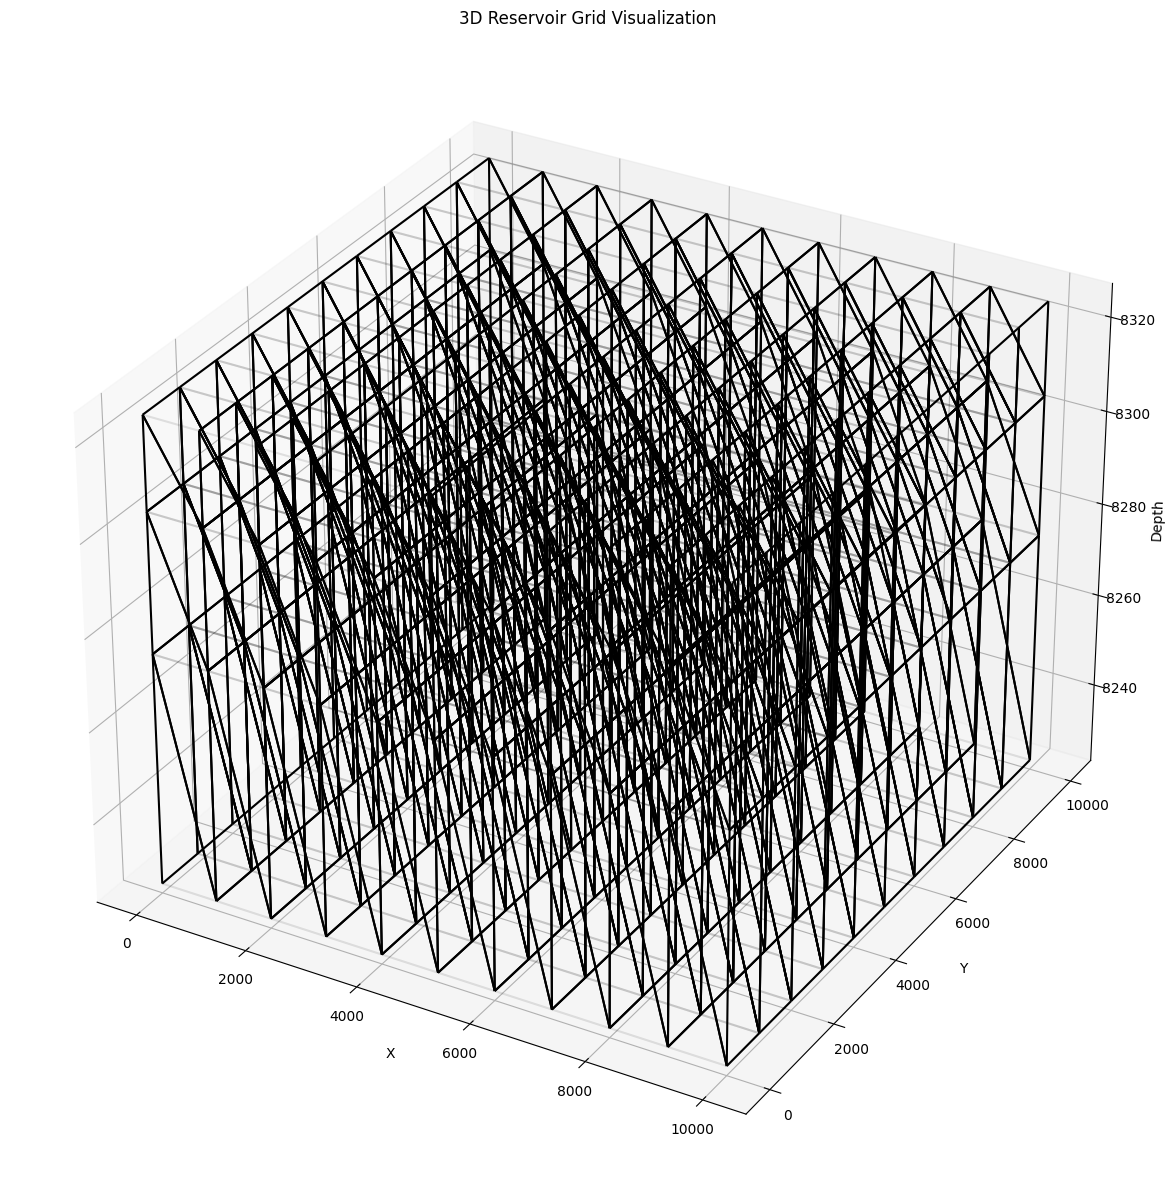

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
nx = 10
ny = 10
nz = 3

dx_value = 1000
dy_value = 1000
dz_values = [20, 30, 50]

# Create 3D plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Drawing the grid blocks' wireframes
for i in range(nx):
    for j in range(ny):
        z_top = tops[0]
        for k in range(nz):
            x_corner = i * dx_value
            y_corner = j * dy_value
            z_bottom = z_top - dz_values[k]
            xx, yy = np.meshgrid([x_corner, x_corner + dx_value], [y_corner, y_corner + dy_value])
            zz_top = np.array([[z_top, z_top], [z_top, z_top]])
            zz_bottom = np.array([[z_bottom, z_bottom], [z_bottom, z_bottom]])
            ax.plot_wireframe(xx, yy, zz_top, color="k", alpha=0.1)
            ax.plot_wireframe(xx, yy, zz_bottom, color="k", alpha=0.1)
            zz = np.array([[z_top, z_bottom], [z_top, z_bottom]])
            for x_side in [x_corner, x_corner + dx_value]:
                ax.plot_wireframe(np.array([[x_side, x_side], [x_side, x_side]]), yy, zz, color="k")
            for y_side in [y_corner, y_corner + dy_value]:
                ax.plot_wireframe(xx, np.array([[y_side, y_side], [y_side, y_side]]), zz, color="k")
            z_top = z_bottom

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Depth')
ax.set_title('3D Reservoir Grid Visualization')

# Display the plot
plt.show()


## Rock Properties Specification

### Introduction:

In reservoir simulation, understanding and quantifying the characteristics of the reservoir rock is pivotal. Two essential properties of reservoir rocks that significantly influence fluid flow are porosity and permeability:

1. **Porosity (PORO)**: Represents the fraction of the rock's volume that is pore space or voids, i.e., the spaces in between rock grains where hydrocarbons can reside. It gives an indication of the storage capacity of the reservoir.

2. **Permeability (PERM)**: A measure of the rock's ability to transmit fluids. It's typically given in Darcies (D) or milliDarcies (mD) and varies in three dimensions (x, y, and z directions).

In the context of the Open Porous Media (OPM) Simulator and many other reservoir simulators, these rock properties need to be specified for each grid block in the reservoir model.

### Code Explanation:

The provided Python code defines a function `rock_properties` that writes the porosity and permeability data for each grid block into a specific file format compatible with the OPM Simulator.

Key components of the function:

1. **Inputs**: 
   - `poro`: A list of porosity values for every grid block.
   - `permx, permy, permz`: Lists of permeability values along the x, y, and z axes for each grid block.

2. **Processing**:
   - The input lists are converted into strings.
   - The rock property data is formatted into sections (PORO, PERMX, PERMY, PERMZ) to comply with the OPM's expected data structure.

3. **Output**:
   - The rock properties are written to a file named "PORO_PERM.DATA", which resides within the "GRID" directory.

After defining the function, the code initializes porosity and permeability values for the entire grid, emphasizing the z-dependent variation in permeabilities. This data is then processed by the `rock_properties` function to generate the desired output file.

In [4]:
from scipy.io import savemat

def rock_properties(poro, permx, permy, permz):
    """
    Append rock properties (PORO, PERMX, PERMY, PERMZ) to the GRID.DATA file.

    Parameters:
    - nx, ny, nz: Number of grid blocks along the x, y, and z axes.
    - poro: List containing porosity values for each grid block.
    - permx, permy, permz: Lists containing permeability values along the x, y, and z axes for each grid block.
    """
    
    # Convert poro, permx, permy, permz to strings
    poro_str = " ".join(map(str, poro))
    permx_str = " ".join(map(str, permx))
    permy_str = " ".join(map(str, permy))
    permz_str = " ".join(map(str, permz))
    
    # Constructing the content string
    content = """PORO
    {} /

PERMX
    {} /

PERMY
    {} /

PERMZ
    {} /
""".format(poro_str, permx_str, permy_str, permz_str)

    with open("runspec/grid/PORO_PERM.DATA", "w") as file:
        file.write("")
        
    # Appending the content to the GRID.DATA file
    with open("runspec/grid/PORO_PERM.DATA", "a") as file:
        file.write(content)

def save_as_mat_file(nx, ny, nz, PORO, PERMX, PERMY, PERMZ, tops, filename="output/input_data.mat"):
    # Reshaping the data to the desired dimensions
    PORO = np.reshape(PORO, (nx, ny, nz), order='F')
    PERMX = np.reshape(PERMX, (nx, ny, nz), order='F')
    PERMY = np.reshape(PERMY, (nx, ny, nz), order='F')
    PERMZ = np.reshape(PERMZ, (nx, ny, nz), order='F')
    tops = np.reshape(tops, (nx, ny))

    # Storing the data in a dictionary
    data = {
        'PORO': PORO,
        'PERMX': PERMX,
        'PERMY': PERMY,
        'PERMZ': PERMZ,
        'tops': tops
    }

    # Saving the data as a .mat file
    savemat(filename, data)


PORO = [0.3]*nx*ny*nz
PERMX = [500]*nx*ny + [50]*nx*ny + [20]*nx*ny
PERMY = [500]*nx*ny + [50]*nx*ny + [20]*nx*ny
PERMZ = [50]*nx*ny + [50]*nx*ny + [25]*nx*ny

rock_properties(PORO, PERMX, PERMY, PERMZ)

save_as_mat_file(nx, ny, nz, PORO, PERMX, PERMY, PERMZ, tops, filename="output/input_data.mat")

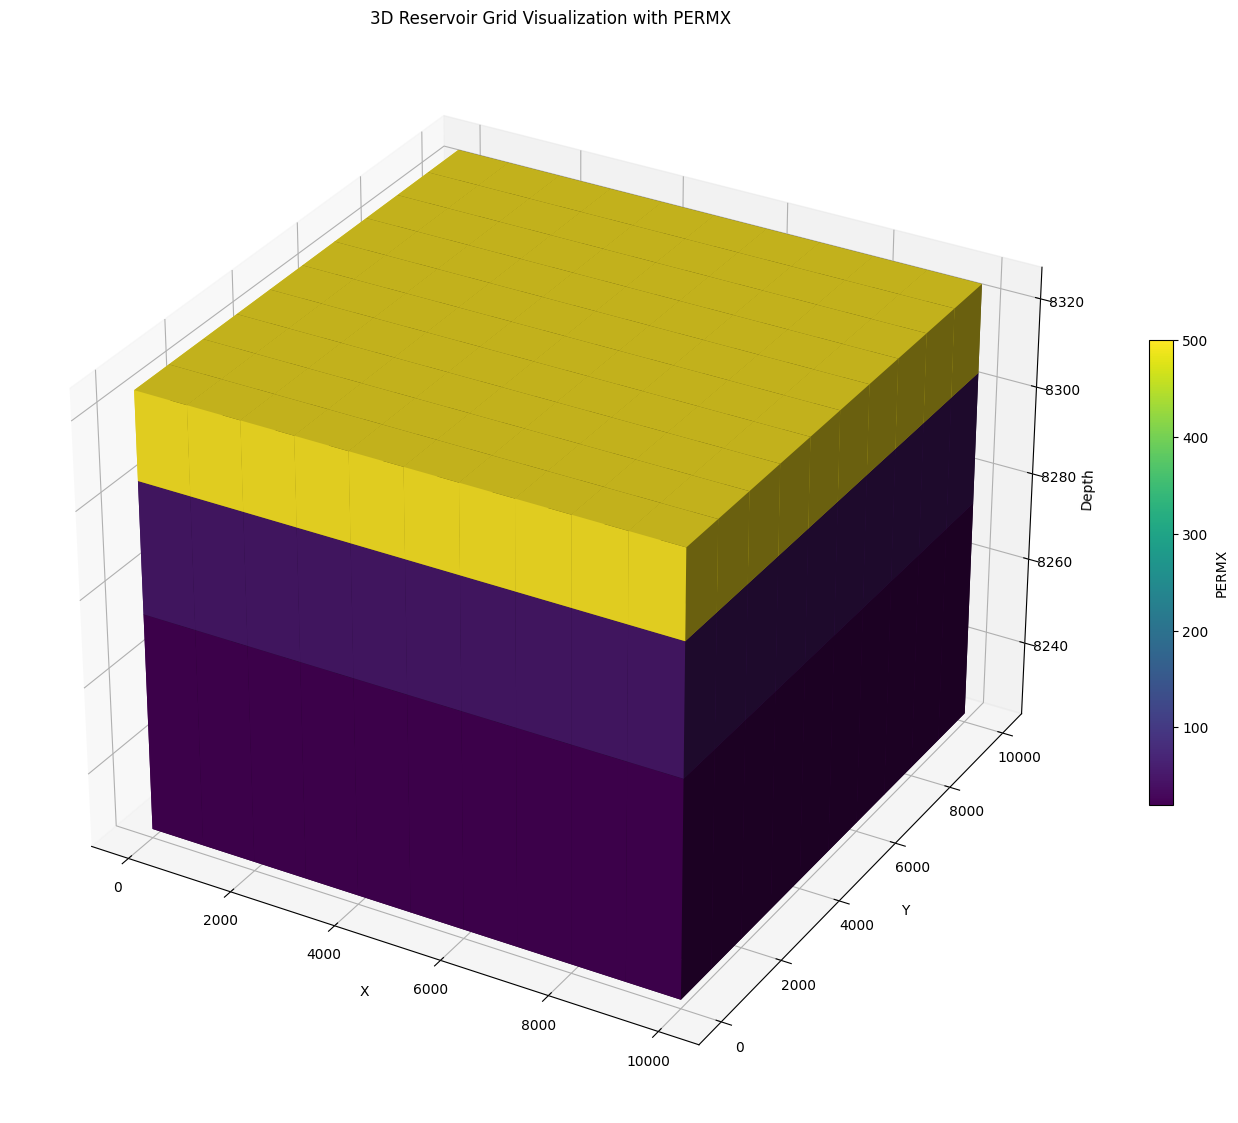

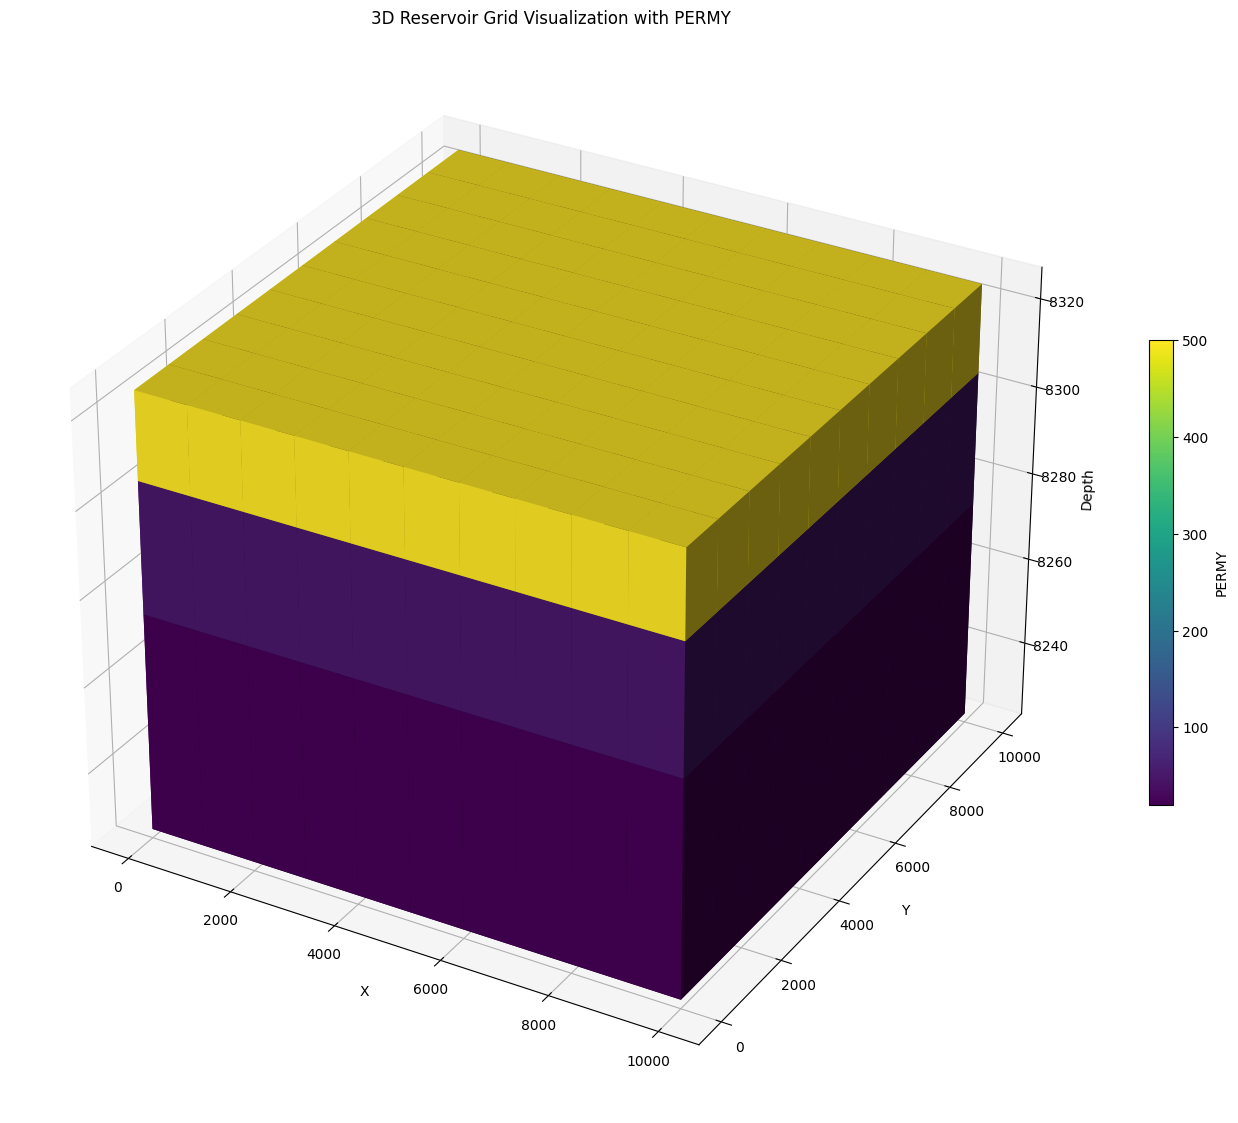

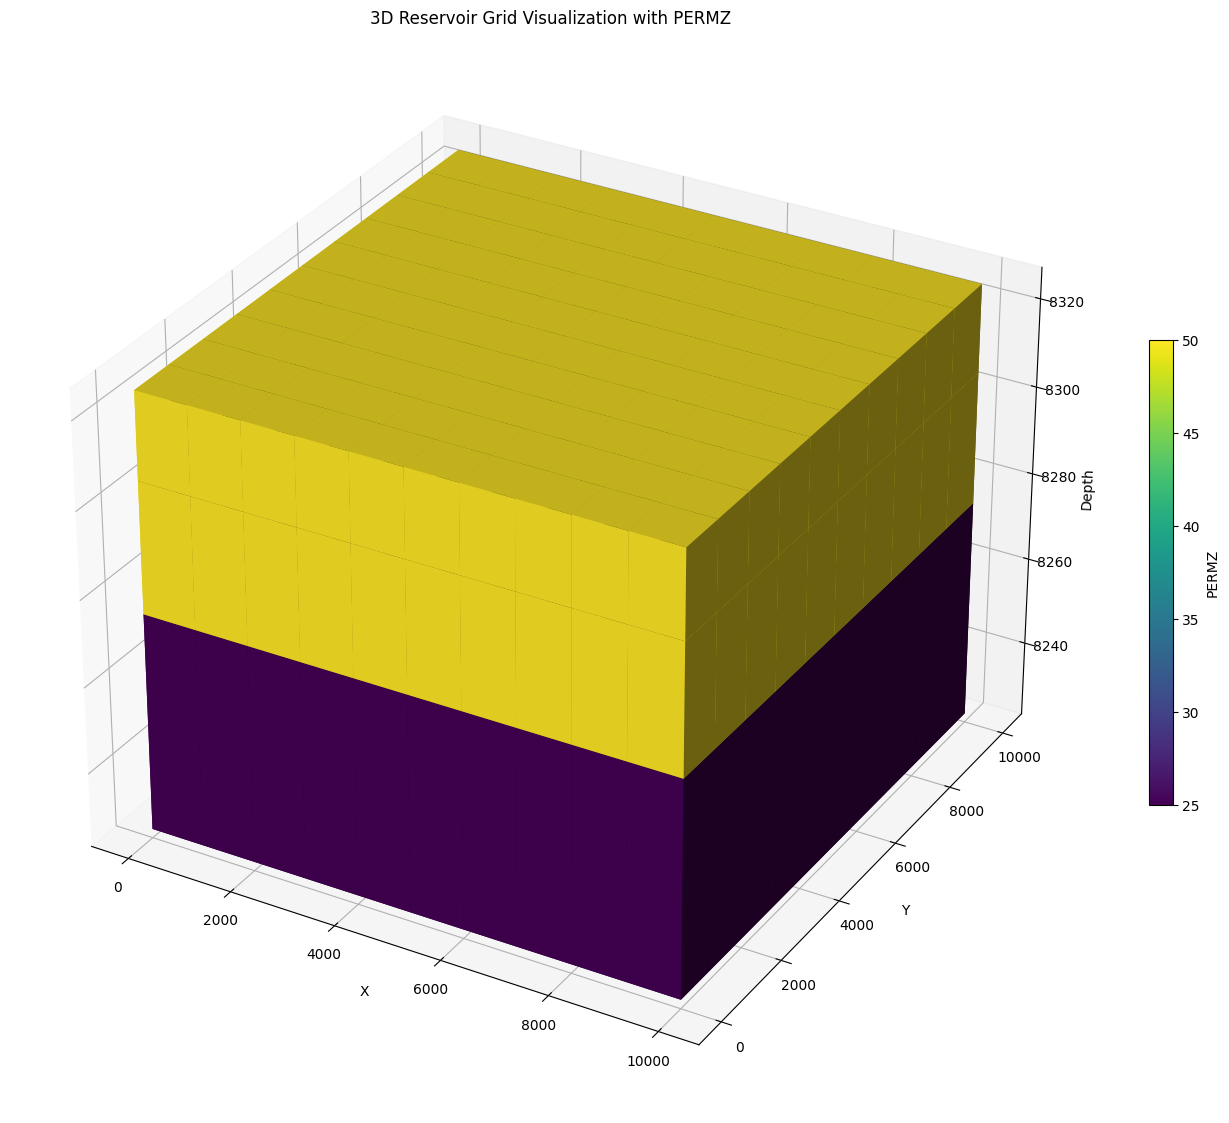

/tmp/ipykernel_20852/2253507566.py:12: RuntimeWarning: invalid value encountered in divide
  data_norm = (data - np.min(data)) / (np.max(data) - np.min(data))


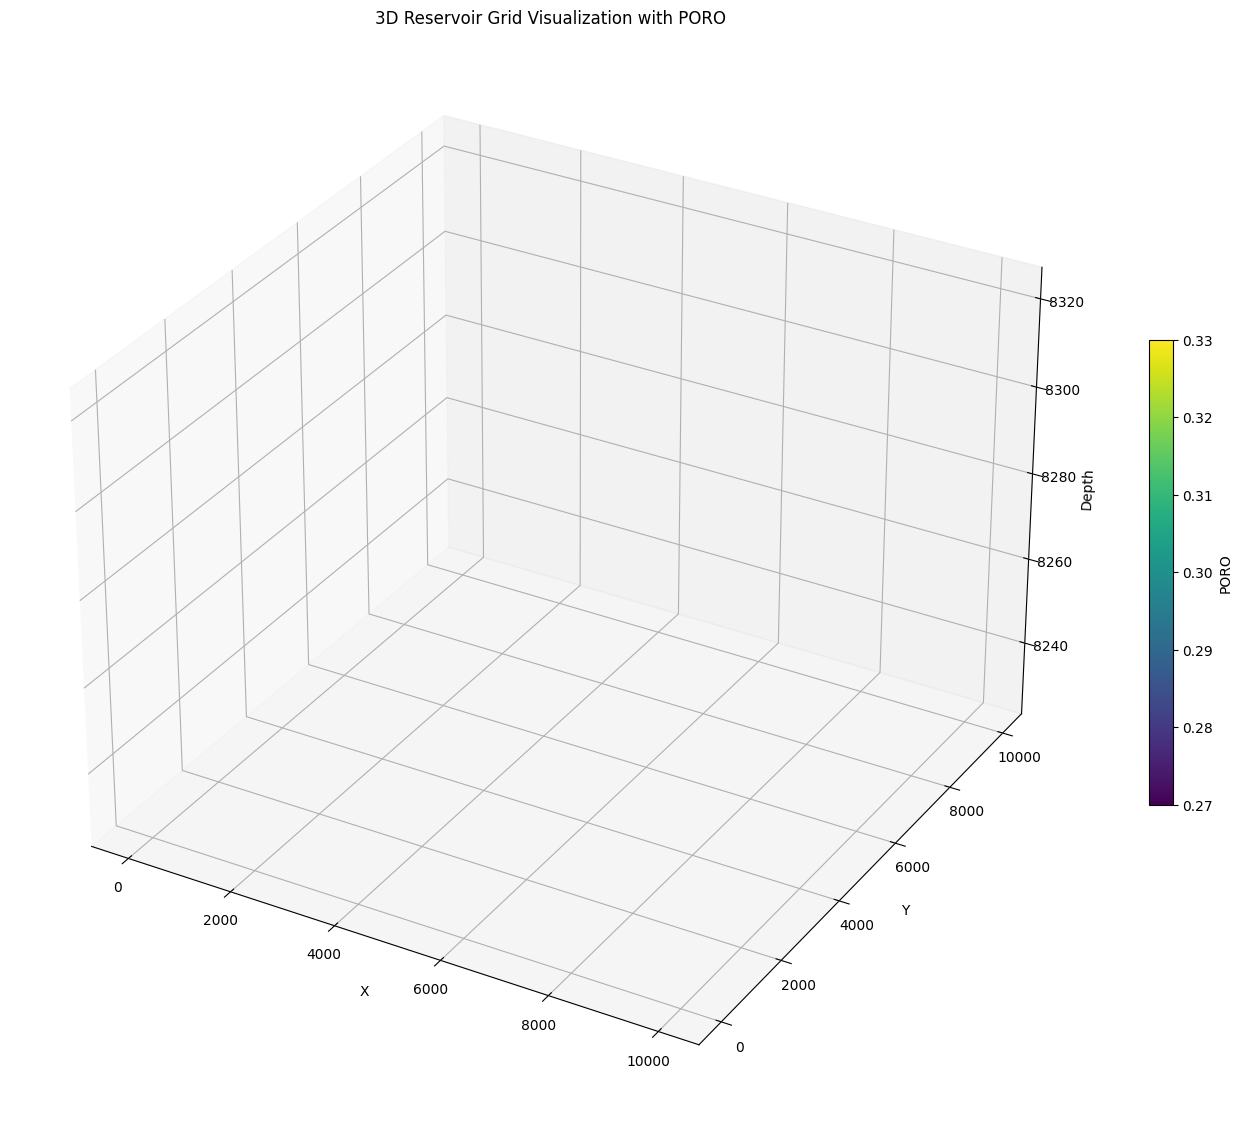

In [5]:
property_data = {
    'PERMX': PERMX,
    'PERMY': PERMY,
    'PERMZ': PERMZ,
    'PORO': PORO
}

colormap = plt.cm.viridis

for property_name, data in property_data.items():
    # Normalizing data for color mapping
    data_norm = (data - np.min(data)) / (np.max(data) - np.min(data))
    data_norm = data_norm.reshape(nx, ny, nz, order='F').flatten()

    # Create 3D plot
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')

   # Drawing the grid blocks with PERMX colors
    for i in range(nx):
        for j in range(ny):
            z_top = tops[0]
            for k in range(nz):
                x_corner = i * dx_value
                y_corner = j * dy_value
                z_bottom = z_top - dz_values[k]
                idx = i*ny*nz + j*nz + k
                xx, yy = np.meshgrid([x_corner, x_corner + dx_value], [y_corner, y_corner + dy_value])
                zz = np.array([[z_top, z_bottom], [z_top, z_bottom]])
                ax.bar3d(xx[0, 0], yy[0, 0], z_bottom,
                        dx_value, dy_value, dz_values[k],
                        shade=True, color=colormap(data_norm[idx]))
                z_top = z_bottom

    # Set labels, title, and colorbar
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Depth')
    ax.set_title(f'3D Reservoir Grid Visualization with {property_name}')
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=np.min(data), vmax=np.max(data))), ax=ax, orientation='vertical', fraction=0.02, pad=0.05)
    cbar.set_label(property_name)

    # Display the plot
    plt.show()


## PVTW Properties in Reservoir Simulation

The `PVTW` keyword in reservoir simulation is essential for defining water's physical and thermodynamic properties in a reservoir. Accurate PVT (Pressure-Volume-Temperature) properties are vital for predicting the behavior of water in the reservoir over time, especially in reservoirs where water production or waterflooding is significant.

The `create_PVTW` function facilitates defining and saving these properties in the required format for reservoir simulators. Here's a breakdown of its parameters:

- **Pressure Reference (pressure_ref)**: It represents the pressure (in psia) at which the subsequent PVT properties are defined. 

- **Water Formation Volume Factor (water_FVF)**: Expressed in rb per bbl or rb per stb, it quantifies the volume change of water from reservoir conditions to surface conditions.

- **Water Compressibility (water_compressibility)**: Measures the fractional change in volume of water per psi change in pressure. It's essential for understanding how water volume might change with reservoir depletion or pressure changes.

- **Water Viscosity (water_viscosity)**: Denoted in centipoise (cp), this parameter indicates the resistance of water to flow. A higher viscosity implies that water will flow less easily through the reservoir rock.

- **Water Viscosibility (water_viscosibility)**: Defines the rate of change of water viscosity with pressure. It helps in understanding how water's flow properties might change as reservoir pressure varies.

The `create_PVTW` function constructs a formatted string of these properties and saves it to a file, ready to be consumed by reservoir simulators. The simulator will utilize these properties, in conjunction with others, to forecast how the reservoir's water phase will behave, thus guiding extraction strategies.

In [6]:
def create_PVTW(pressure_ref, water_FVF, water_compressibility, water_viscosity, water_viscosibility):
    """
    Create and save the PVTW properties.

    Parameters:
    - pressure_ref (float): Pressure reference in psia.
    - water_FVF (float): Water formation volume factor in rb per bbl or rb per stb.
    - water_compressibility (float): Water compressibility in psi^{-1}.
    - water_viscosity (float): Water viscosity in cp.
    - water_viscosibility (float): Water 'viscosibility' in psi^{-1}.
    - unit (str): Specifies the unit system, either "FIELD" or "METRIC".
    """
    
    # Constructing the content string
    content = """PVTW
     {} {} {} {} {} /
""".format(pressure_ref, water_FVF, water_compressibility, water_viscosity, water_viscosibility)

    # Decide the file name based on the unit system
    filename = "runspec/grid/PVTW.DATA"

    # Saving the content to the specified file
    with open(filename, "w") as file:
        file.write(content)

# Example Usage (For FIELD units)
create_PVTW(4017.55, 1.038, 3.22e-6, 0.318, 0.0)

## ROCK Properties in Reservoir Simulation

The behavior of a reservoir's rock in response to pressure changes plays a pivotal role in reservoir dynamics. As oil, gas, and water are produced, and as water or gas might be injected, the reservoir pressure can fluctuate. This change can impact the volume of the reservoir rock, influencing the total pore volume available and potentially the rock's permeability.

The `ROCK` keyword in reservoir simulation software defines specific rock properties that capture its compressibility characteristics. The `create_ROCK` function aids in establishing these properties for a simulation.

Let's delve into its parameters:

- **Reference Pressure (ref_pressure)**: Represents the pressure (typically in psia) at which rock compressibility is specified. It often serves as a baseline to understand how rock volume changes might occur from this reference state.

- **Rock Compressibility (rock_compressibility)**: This parameter quantifies the fractional change in rock volume (and thus pore volume) per psi change in pressure. Positive values imply that the rock contracts (and pore volume decreases) as pressure increases, which is the usual case for most rocks.

The `create_ROCK` function produces a formatted representation of these properties and then saves it in a file. This data becomes part of the input for reservoir simulators, which use it to anticipate how the reservoir rock might adjust in volume as the reservoir undergoes various pressure changes. Such considerations are fundamental when forecasting reservoir performance and strategizing production or injection operations.

In [7]:
def create_ROCK(ref_pressure, rock_compressibility):
    """
    Create and save the ROCK properties.

    Parameters:
    - ref_pressure (float): Reference pressure in psia.
    - rock_compressibility (float): Rock compressibility in psi^{-1}.
    """
    
    # Constructing the content string
    content = """ROCK
     {} {} /
""".format(ref_pressure, rock_compressibility)

    # Saving the content to a file
    with open("runspec/grid/ROCK.DATA", "w") as file:
        file.write(content)

# Example Usage
create_ROCK(14.7, 3E-6)


## Water and Oil Phase Relative Permeabilities

In petroleum reservoir engineering, understanding the relative ease with which each fluid flows in the reservoir, especially when more than one fluid is present, is fundamental. The relative permeabilities are a measure of this, and they quantify the flow capacity of a fluid phase in the presence of others.

The `SWOF` keyword is one of the primary keywords used in reservoir simulators to define relative permeabilities and capillary pressure functions for water and oil when they are the only two phases present in the reservoir. It's essential for predicting the flow of oil and water in the reservoir.

Let's break down the `save_SWOF` function:

- The function reads in a DataFrame `df` containing:
  - **Water Saturation (`SW`)**: Represents the fraction of pore volume occupied by water. It typically ranges from the residual water saturation to 1.
  - **Water Relative Permeability (`Kr`)**: The ability of water to flow relative to its ability to flow when it's the only fluid present.
  - **Oil Relative Permeability (`Kro`)**: Represents the flow capacity of oil when both water and oil are present in the reservoir.
  - **Water-Oil Capillary Pressure (`Pcow`)**: This is the pressure difference across the interface between oil and water phases due to capillary forces. It can influence the distribution and flow of water and oil in the reservoir.

The function then formats the data correctly and writes it to a file named `SWOF.DATA`. This file is used as an input in reservoir simulation runs, enabling the simulator to account for the relative movement of water and oil in the reservoir based on the saturation conditions.

Understanding and having accurate `SWOF` curves is crucial as they impact production rates, recovery factors, and reservoir management strategies.

In [8]:
import pandas as pd

def save_SWOF(df):
    """
    Save the SWOF properties from a dataframe to a file.

    Parameters:
    - df (DataFrame): Dataframe containing SWOF data. Columns expected:
      'SW': water saturation,
      'Kr': water relative permeability,
      'Kro': oil relative permeability when only oil and water are present,
      'Pcow': water-oil capillary pressure (in psi).
    """
    
    # Convert dataframe rows to formatted strings
    content_rows = df.apply(lambda row: "{}\t{}\t{}\t{}".format(row['SW'], row['Kr'], row['Kro'], row['Pcow']), axis=1)
    
    # Combine header, rows, and termination symbol to form content
    content = "SWOF\n" + "\n".join(content_rows) + " /\n"

    # Saving the content to a file
    with open("runspec/grid/SWOF.DATA", "w") as file:
        file.write(content)

In [9]:
df_swof = pd.DataFrame([
[0.12,	0,    		 	1,	0],
[0.18,	4.64876033057851E-8,	1,	0],
[0.24,	0.000000186,		0.997,	0],
[0.3,	4.18388429752066E-7,	0.98,	0],
[0.36,	7.43801652892562E-7,	0.7,	0],
[0.42,	1.16219008264463E-6,	0.35,	0],
[0.48,	1.67355371900826E-6,	0.2,	0],
[0.54,	2.27789256198347E-6,	0.09,	0],
[0.6,	2.97520661157025E-6,	0.021,	0],
[0.66,	3.7654958677686E-6,	0.01,	0],
[0.72,	4.64876033057851E-6,	0.001,	0],
[0.78,	0.000005625,		0.0001,	0],
[0.84,	6.69421487603306E-6,	0,	0],
[0.91,	8.05914256198347E-6,	0,	0],
[1,	0.00001,			0,	0 ],
], columns=['SW', 'Kr', 'Kro', 'Pcow'])
save_SWOF(df_swof)


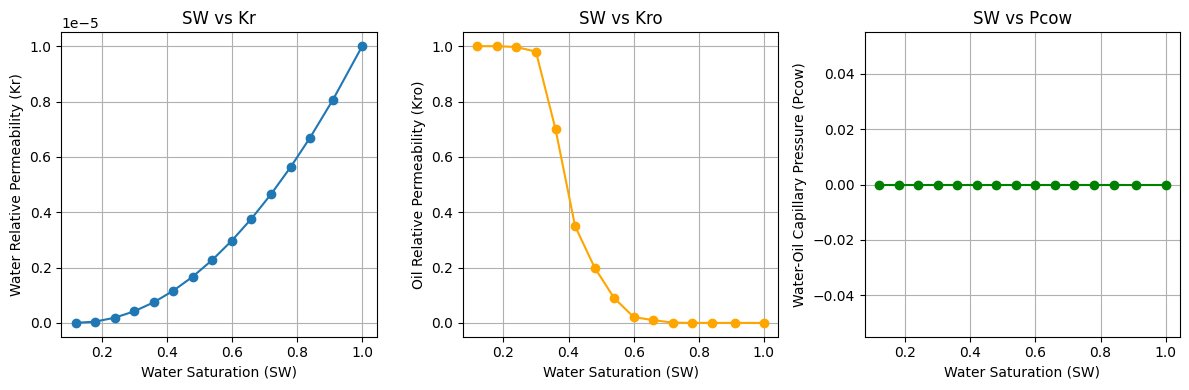

In [10]:
# Plot Water saturation vs Water relative permeability
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(df_swof['SW'], df_swof['Kr'], '-o')
plt.xlabel('Water Saturation (SW)')
plt.ylabel('Water Relative Permeability (Kr)')
plt.title('SW vs Kr')
plt.grid(True)

# Plot Water saturation vs Oil relative permeability
plt.subplot(1, 3, 2)
plt.plot(df_swof['SW'], df_swof['Kro'], '-o', color='orange')
plt.xlabel('Water Saturation (SW)')
plt.ylabel('Oil Relative Permeability (Kro)')
plt.title('SW vs Kro')
plt.grid(True)

# Plot Water saturation vs Water-Oil capillary pressure
plt.subplot(1, 3, 3)
plt.plot(df_swof['SW'], df_swof['Pcow'], '-o', color='green')
plt.xlabel('Water Saturation (SW)')
plt.ylabel('Water-Oil Capillary Pressure (Pcow)')
plt.title('SW vs Pcow')
plt.grid(True)

plt.tight_layout()
plt.show()

## SGOF Properties in Reservoir Simulation

In reservoir simulation, the `SGOF` keyword provides a way to define properties related to gas-oil systems. As the reservoir is produced and fluids move around, the relative proportions of oil and gas in any given location can change. The interaction and relative flow of these two fluids are essential for accurate reservoir predictions. This interaction is quantified by the relative permeabilities of gas and oil, as well as the capillary pressure between the two phases.

- **Gas Saturation (Sg)**: Represents the fraction of pore space occupied by gas. As gas saturation increases, the space available for oil decreases, and vice versa.

- **Gas Relative Permeability (Krg)**: Quantifies the ease with which gas can flow through the rock, given the presence of other fluids. It varies with gas saturation.

- **Oil Relative Permeability (Kro)**: Similarly, this parameter quantifies the ease with which oil can flow when oil, gas, and connate water are present in the reservoir. This also varies with gas saturation.

- **Oil-Gas Capillary Pressure (Pcog)**: Describes the pressure difference at the interface between oil and gas phases, which can affect the movement of these fluids. It's an important factor in reservoirs where capillary forces are significant.

The `save_SGOF` function facilitates saving these properties in the required format for reservoir simulators. The simulator will utilize these properties, in conjunction with others, to predict how the reservoir will behave over time. Specifically, it will help the simulator understand how oil and gas will move relative to each other as production proceeds, ultimately guiding decisions on how best to extract these resources.

In [11]:
def save_SGOF(df_sgof):
    """
    Save the SGOF properties from a dataframe to a file.

    The SGOF keyword defines gas and oil relative permeabilities and oil-gas 
    capillary pressure as functions of gas saturation.

    Parameters:
    - df_sgof (DataFrame): Dataframe containing SGOF data with columns:
        'Sg': Gas saturation.
        'Krg': Gas relative permeability.
        'Kro': Oil relative permeability when oil, gas, and connate water are present.
        'Pcog': Oil-gas capillary pressure in psi.
    """
    
    # Convert dataframe rows to formatted strings
    content_rows = df_sgof.apply(
        lambda row: "{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}".format(row['Sg'], row['Krg'], row['Kro'], row['Pcog']), 
        axis=1
    )
    
    # Combine header, rows, and termination symbol
    content = "SGOF\n" + "\n".join(content_rows) + " /\n"

    # Saving the content to a file
    with open("runspec/grid/SGOF.DATA", "w") as file:
        file.write(content)

In [12]:
df_sgof = pd.DataFrame([
[0,	0,	1,	0],
[0.001,	0,	1,	0],
[0.02,	0,	0.997,	0],
[0.05,	0.005,	0.980,	0],
[0.12,	0.025,	0.700,	0],
[0.2,	0.075,	0.350,	0],
[0.25,	0.125,	0.200,	0],
[0.3,	0.190,	0.090,	0],
[0.4,	0.410,	0.021,	0],
[0.45,	0.60,	0.010,	0],
[0.5,	0.72,	0.001,	0],
[0.6,	0.87,	0.0001,	0],
[0.7,	0.94,	0.000,	0],
[0.85,	0.98,	0.000,	0], 
[0.88,	0.984,	0.000,	0]], columns=['Sg', 'Krg', 'Kro', 'Pcog'])

save_SGOF(df_sgof)

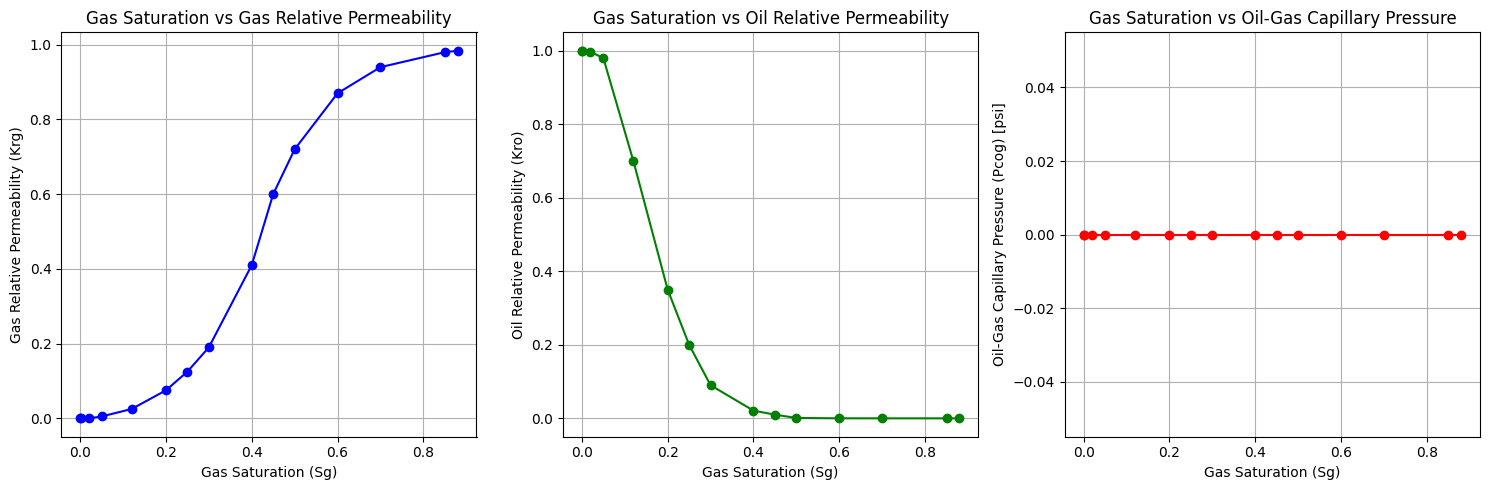

In [13]:
# Plot Gas Saturation vs Gas Relative Permeability
plt.figure(figsize=(15, 5))

# Subplot 1: Gas Saturation vs Gas Relative Permeability
plt.subplot(1, 3, 1)
plt.plot(df_sgof['Sg'], df_sgof['Krg'], '-o', color='blue')
plt.title('Gas Saturation vs Gas Relative Permeability')
plt.xlabel('Gas Saturation (Sg)')
plt.ylabel('Gas Relative Permeability (Krg)')
plt.grid(True)

# Subplot 2: Gas Saturation vs Oil Relative Permeability
plt.subplot(1, 3, 2)
plt.plot(df_sgof['Sg'], df_sgof['Kro'], '-o', color='green')
plt.title('Gas Saturation vs Oil Relative Permeability')
plt.xlabel('Gas Saturation (Sg)')
plt.ylabel('Oil Relative Permeability (Kro)')
plt.grid(True)

# Subplot 3: Gas Saturation vs Oil-Gas Capillary Pressure
plt.subplot(1, 3, 3)
plt.plot(df_sgof['Sg'], df_sgof['Pcog'], '-o', color='red')
plt.title('Gas Saturation vs Oil-Gas Capillary Pressure')
plt.xlabel('Gas Saturation (Sg)')
plt.ylabel('Oil-Gas Capillary Pressure (Pcog) [psi]')
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## DENSITY Properties

The `DENSITY` keyword in reservoir simulation is fundamental for specifying the densities of fluids present in the reservoir, specifically oil, water, and gas, at surface conditions. These densities are used by the simulator to compute mass flow rates, pressures, and other critical reservoir parameters.

- **OilDensity**: Represents the density of oil at surface conditions and is measured in lb/ft³.
- **WaterDensity**: Represents the density of water at surface conditions, also in lb/ft³.
- **GasDensity**: Represents the density of gas at surface conditions, again in lb/ft³.

The function `save_DENSITY` allows us to easily save these density values from a DataFrame into the required format for input to the reservoir simulator. The simulator will use these provided densities in conjunction with other input parameters and properties to model the reservoir's behavior accurately over time.

Below, we define and use this function to set the fluid densities in our reservoir model.

In [14]:
def save_DENSITY(df_density):
    """
    Save the DENSITY properties from a dataframe to a file.
    
    The DENSITY keyword defines the densities of oil, water, and gas 
    at surface conditions in lb/ft³.

    Parameters:
    - df_density (DataFrame): Dataframe containing DENSITY data with columns:
        'OilDensity': Density of oil at surface conditions in lb/ft³.
        'WaterDensity': Density of water at surface conditions in lb/ft³.
        'GasDensity': Density of gas at surface conditions in lb/ft³.
    """
    
    # Convert dataframe row to formatted string
    content_row = df_density.apply(
        lambda row: "{:.4f}\t{:.4f}\t{:.4f}".format(row['OilDensity'], row['WaterDensity'], row['GasDensity']), 
        axis=1
    ).iloc[0]
    
    # Combine header, row, and termination symbol
    content = "DENSITY\n" + content_row + " /\n"

    # Saving the content to a file
    with open("runspec/grid/DENSITY.DATA", "w") as file:
        file.write(content)

# Sample usage
df_density = pd.DataFrame([{
    'OilDensity': 53.66,
    'WaterDensity': 64.49,
    'GasDensity': 0.0533
}])

save_DENSITY(df_density)

## PVDG (Pressure-Volume Diagram for Gas) Data

In reservoir simulation, the behavior of gases is fundamentally influenced by their pressure. As gas pressure varies, both its volume and viscosity can change significantly. Capturing these variations accurately is essential for realistic simulations, particularly in gas condensate or dry gas reservoirs.

The `PVDG` keyword is used to define properties of the gas phase as functions of gas phase pressure. The properties included are:

- **Gas Formation Volume Factor (FVF)**: This factor describes how much a specific quantity of gas at reservoir conditions would occupy at surface conditions (standard pressure and temperature). It is typically given in units of reservoir barrels per standard cubic feet (rb/Mscf).

- **Gas Viscosity**: As with any fluid, the viscosity of gas can vary with its pressure. Viscosity affects the mobility of the gas in the reservoir and hence is a key parameter to model. It is typically given in centipoise (cP).

The function `save_PVDG` takes a DataFrame that contains gas phase pressure, FVF, and viscosity, and writes it to a file in the format expected by reservoir simulators.

Let's explore this in the following code cell:

In [15]:
def save_PVDG(df_pvdg):
    """
    Save the PVDG properties to a file.

    This function is utilized in reservoir simulation for defining gas phase properties 
    as a function of gas phase pressure. The PVDG keyword is particularly relevant for 
    simulations involving gas condensate reservoirs or dry gas reservoirs.

    Parameters:
    - df_pvdg (DataFrame): Contains PVDG data.
        - 'Pressure': Gas phase pressure in psia.
        - 'FVF': Gas formation volume factor in rb per Mscf.
        - 'Viscosity': Gas viscosity in cP.
    """
    
    # Constructing the content using formatted strings
    content_rows = df_pvdg.apply(lambda row: "{:.3f}\t{:.5f}\t{:.5f}".format(row['Pressure'], row['FVF'], row['Viscosity']), axis=1)
    content = "PVDG\n" + "\n".join(content_rows) + " /\n"

    # Saving the content to the appropriate file
    with open("runspec/grid/PVDG.DATA", "w") as file:
        file.write(content)

# Sample usage
df_pvdg = pd.DataFrame({
    'Pressure': [14.700, 264.70, 514.70, 1014.7, 2014.7, 2514.7, 3014.7, 4014.7, 5014.7, 9014.7],
    'FVF': [166.666, 12.0930, 6.27400, 3.19700, 1.61400, 1.29400, 1.08000, 0.81100, 0.64900, 0.38600],
    'Viscosity': [0.008000, 0.009600, 0.011200, 0.014000, 0.018900, 0.020800, 0.022800, 0.026800, 0.030900, 0.047000]
})

save_PVDG(df_pvdg)

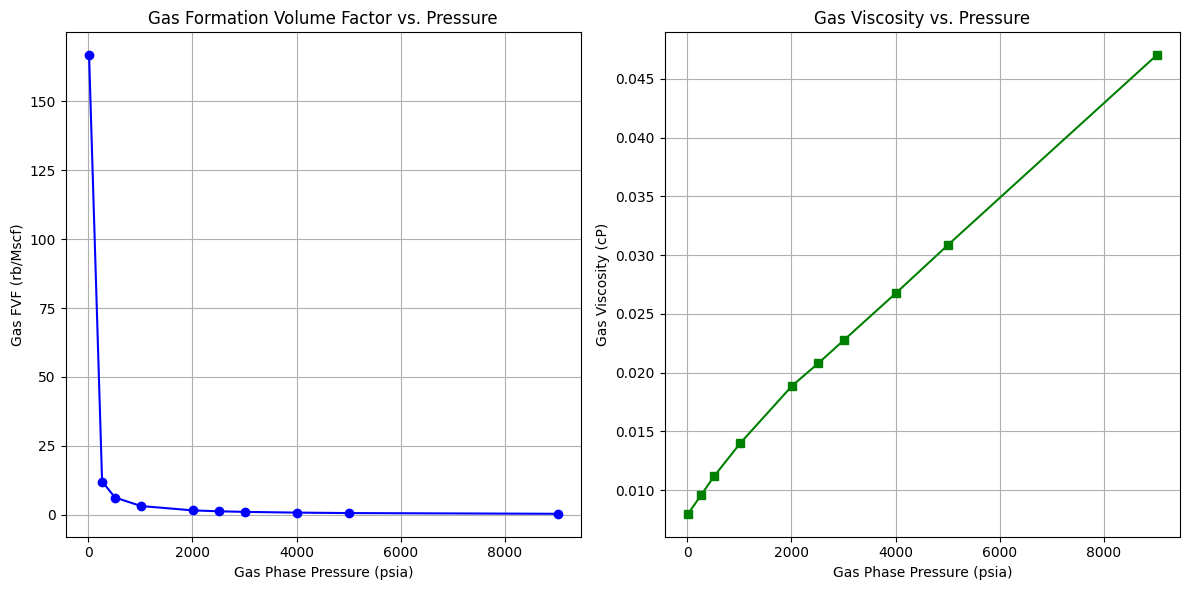

In [16]:
# Extract data from the DataFrame
pressure = df_pvdg['Pressure']
fvf = df_pvdg['FVF']
viscosity = df_pvdg['Viscosity']

# Plotting Gas Formation Volume Factor (FVF) vs. Pressure
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(pressure, fvf, 'o-', color='blue')
plt.xlabel('Gas Phase Pressure (psia)')
plt.ylabel('Gas FVF (rb/Mscf)')
plt.title('Gas Formation Volume Factor vs. Pressure')
plt.grid(True)

# Plotting Gas Viscosity vs. Pressure
plt.subplot(1, 2, 2)
plt.plot(pressure, viscosity, 's-', color='green')
plt.xlabel('Gas Phase Pressure (psia)')
plt.ylabel('Gas Viscosity (cP)')
plt.title('Gas Viscosity vs. Pressure')
plt.grid(True)

plt.tight_layout()
plt.show()


## Pressure-Volume-Temperature (PVT) Analysis in Reservoir Simulation

In the domain of reservoir engineering and simulation, understanding the behavior of reservoir fluids under varying conditions is paramount. This is where **Pressure-Volume-Temperature (PVT) analysis** comes into play.

- **Pressure (P)**: As reservoirs are buried deep below the Earth's surface, the hydrocarbons within are subjected to high pressures. Pressure is a primary control on fluid properties and dictates the phase behavior of the hydrocarbon system. Variations in reservoir pressure, due to production or injection activities, can have profound effects on the fluid properties and, in turn, on reservoir performance.

- **Volume (V)**: Volume here pertains to the volume occupied by hydrocarbons under reservoir conditions versus standard or surface conditions. The relation of reservoir volume to standard volume is encapsulated in factors such as Formation Volume Factor (FVF). This factor is crucial in estimating the actual reservoir quantities and predicting production profiles.

- **Temperature (T)**: Temperature gradients exist in the subsurface, and temperature can influence fluid properties, particularly viscosity. While temperature changes in reservoirs are typically minor compared to pressure changes, it is vital for accurate modeling in thermal recovery processes or when considering deep or geothermal reservoirs.

The combination of these three parameters—P, V, and T—provides a snapshot of the fluid's phase behavior, i.e., whether it exists in a gaseous, liquid, or supercritical state. In reservoir simulation, incorporating accurate PVT data is essential. It ensures that fluid flow through the reservoir rock and the associated phase changes (like condensation or evaporation) are precisely represented.

PVT data is often sourced from laboratory measurements on reservoir fluid samples and is then input into reservoir simulators to fine-tune models, ensuring they're representative of the real-world reservoir's behavior.

In [17]:
def save_PVTO(data_blocks):
    """
    Save the PVTO (Pressure-Volume-Temperature Oil data) properties to a file.

    The PVTO table provides information about the oil phase in the reservoir as a function of pressure, 
    with specific attention to the oil's behavior around its bubble point (when the first bubble of gas comes out of solution). 
    It captures how the oil's properties change when gas begins to evolve from it.

    Parameters:
    - data_blocks (List[List[Tuple]]): Nested lists, each containing tuples representing a set of PVT data points.
        Each tuple consists of:
            - Rs (float): Dissolved gas-oil ratio in Mscf per stb.
            - P (float): Bubble point pressure in psia.
            - FVF (float): Oil formation volume factor for saturated oil in rb per stb.
            - Viscosity (float): Oil viscosity for saturated oil in cP.

    Example of `data_blocks` format:
    [
        [(Rs1, P1, FVF1, Viscosity1), (Rs2, P2, FVF2, Viscosity2)],
        [(Rs3, P3, FVF3, Viscosity3), ...],
        ...
    ]
    """
    
    # Header content
    header = """PVTO
"""
    
    # Process each data block
    blocks_content = []
    for block in data_blocks:
        block_lines = []
        for row in block:
            # Unpack tuple with defaults
            Rs, P, FVF, Viscosity = (*row, 0.0, 0.0, 0.0)[:4]
            block_lines.append("{}\t{}\t{}\t{}".format(Rs, P, FVF, Viscosity))
        # Combine the block lines and append to the blocks content
        blocks_content.append("\n".join(block_lines) + " /")

    # Combine header and blocks
    content = header + "\n".join(blocks_content) + '\n /'

    # Saving the content to a file
    with open("runspec/grid/PVTO.DATA", "w") as file:
        file.write(content)

# Sample usage
data_blocks = [
    [(0.0010, 14.7, 1.0620, 1.0400)],
    [(0.0905, 264.7, 1.1500, 0.9750)],
    [(0.1800, 514.7, 1.2070, 0.9100)],
    [(0.3710, 1014.7, 1.2950, 0.8300)],
    [(0.6360, 2014.7, 1.4350, 0.6950)],
    [(0.7750, 2514.7, 1.5000, 0.6410)],
    [(0.9300, 3014.7, 1.5650, 0.5940)],
    [(1.2700, 4014.7, 1.6950, 0.5100), ('', 9014.7, 1.5790, 0.7400)],
    [(1.6180, 5014.7, 1.8270, 0.4490), ('', 9014.7, 1.7370, 0.6310)]
]

save_PVTO(data_blocks)


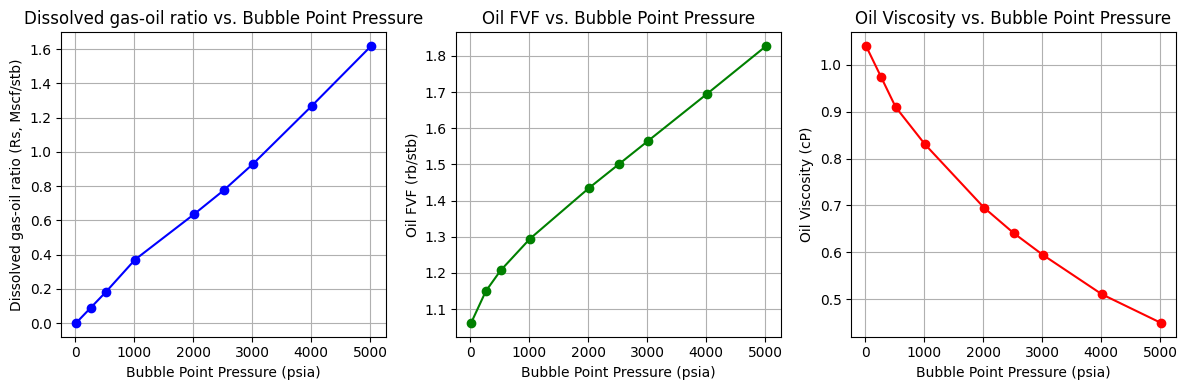

In [18]:
# Extracting data for plotting
Rs = [block[0][0] for block in data_blocks]
P = [block[0][1] for block in data_blocks]
FVF = [block[0][2] for block in data_blocks]
Viscosity = [block[0][3] for block in data_blocks]

# Rs vs. P
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(P, Rs, '-o', color='b')
plt.title("Dissolved gas-oil ratio vs. Bubble Point Pressure")
plt.xlabel("Bubble Point Pressure (psia)")
plt.ylabel("Dissolved gas-oil ratio (Rs, Mscf/stb)")
plt.grid(True)

# FVF vs. P
plt.subplot(1, 3, 2)
plt.plot(P, FVF, '-o', color='g')
plt.title("Oil FVF vs. Bubble Point Pressure")
plt.xlabel("Bubble Point Pressure (psia)")
plt.ylabel("Oil FVF (rb/stb)")
plt.grid(True)

# Viscosity vs. P
plt.subplot(1, 3, 3)
plt.plot(P, Viscosity, '-o', color='r')
plt.title("Oil Viscosity vs. Bubble Point Pressure")
plt.xlabel("Bubble Point Pressure (psia)")
plt.ylabel("Oil Viscosity (cP)")
plt.grid(True)

plt.tight_layout()
plt.show()


## Equilibrium Initialization for Reservoir Simulation (`EQUIL` Keyword)

In reservoir simulation, accurately initializing the reservoir's state is pivotal for predicting future performance. The `EQUIL` keyword is used to specify equilibrium conditions, simplifying the initial state definition for oil, water, and gas phases. It eliminates the need to set initial conditions grid block by grid block, offering a more streamlined approach.

The parameters provided are:
- **Datum Depth**: A reference depth from which pressures are calculated. Essentially, it's a benchmark level in the reservoir.
- **Pressure at Datum**: The pressure at this benchmark level. 
- **Water-Oil Contact Depth**: This indicates the depth at which water starts displacing oil in a reservoir that's been filling up gradually. 
- **Oil-Water Capillary Pressure**: Represents the capillary pressure at the water-oil interface.
- **Gas-Oil Contact Depth**: Similar to the water-oil contact, this signifies where gas begins to displace oil.
- **Gas-Oil Capillary Pressure**: The capillary pressure at the gas-oil contact.
- **RSVD table & RVVD table**: These tables help define the gas-oil ratio variations with depth in the reservoir.

The function `save_EQUIL` accepts these parameters, formats them according to the reservoir simulator's requirements, and writes the resultant data to an `EQUIL.DATA` file. This formatted data can then be directly ingested by reservoir simulation tools for accurate and efficient initialization.

In [19]:
def save_EQUIL(datum_depth, pressure_at_datum, water_oil_contact_depth, oil_water_cap_pressure,
               gas_oil_contact_depth, gas_oil_cap_pressure, RSVD_table, RVVD_table, supported_value=0):
    """
    Save the reservoir initialization data using the EQUIL keyword to a file.

    This function facilitates the process of defining equilibrium conditions for oil, water, 
    and gas phases in reservoir simulation. This initial state aids in predicting the reservoir's
    behavior during production.

    Parameters:
    - datum_depth (float): Reference depth (ft) from which pressures are calculated.
    - pressure_at_datum (float): Pressure (psia) at the datum depth.
    - water_oil_contact_depth (float): Depth (ft) at which water displaces oil in a gradually filled reservoir.
    - oil_water_cap_pressure (float): Capillary pressure (psi) at the water-oil contact.
    - gas_oil_contact_depth (float): Depth (ft) at which gas displaces oil in a gradually filled reservoir.
    - gas_oil_cap_pressure (float): Capillary pressure (psi) at the gas-oil contact.
    - RSVD_table (int): Index for the RSVD table, defining the gas-oil ratio above the gas-oil contact.
    - RVVD_table (int): Index for the RVVD table, defining the oil-gas ratio below the gas-oil contact.
    - supported_value (int, optional): A parameter supported by OPM. Default is 0.

    Outputs:
    - A file named "EQUIL.DATA" in the "runspec/grid/" directory containing the formatted EQUIL properties.
    """
    
    # Formatting the EQUIL data
    content = "EQUIL\n{} {} {} {} {} {} {} {} {} /\n".format(datum_depth, pressure_at_datum, 
                                                            water_oil_contact_depth, oil_water_cap_pressure, 
                                                            gas_oil_contact_depth, gas_oil_cap_pressure, 
                                                            RSVD_table, RVVD_table, supported_value)

    # Saving the content to a file
    with open("runspec/grid/EQUIL.DATA", "w") as file:
        file.write(content)

# Sample usage
save_EQUIL(8400, 4800, 8450, 0, 8300, 0, 1, 0)


In [20]:
def save_RSVD(data):
    """
    Save the RSVD (Reservoir Solution Gas-Oil Ratio vs Depth) properties to a file.

    The RSVD keyword is used to provide the dissolved gas-oil ratio (GOR) as a function of depth.
    This is particularly useful when the initial reservoir pressure is higher than the bubble point 
    pressure, implying no free gas is initially present. In such cases, the dissolved GOR remains 
    constant with depth throughout the reservoir.

    Parameters:
    - data (List[Tuple[float]]): A list of tuples, where each tuple represents a (depth, GOR value).

    Outputs:
    Writes the formatted RSVD data to a file named "RSVD.DATA" in the "runspec/grid/" directory.
    """
    
    # Constructing the RSVD data content
    content_rows = "\n".join("{} {}".format(depth, GOR) for depth, GOR in data)
    content = "RSVD\n" + content_rows + " /\n"

    # Saving the content to a file
    with open("runspec/grid/RSVD.DATA", "w") as file:
        file.write(content)

# Sample usage
sample_data = [(8300, 1.270), (8450, 1.270)]
save_RSVD(sample_data)


# Summary Files

In [21]:
import os
values = ['BGPR', 'BPR', 'BWPR', 'BGSAT', 'BOSAT', 'BWSAT', 'BGPV', 'BHPV', 'BOPV', 'BRPV', 'BWPV',
          "BFLOGI",  "BFLOGK", "BPPG", "BVELGI", "BVELGJ", "BVELGK",
          "BFLOOI", "BFLOOJ", "BFLOOK", "BPPO", "BVELOI", "BVELOJ", "BVELOK", "BFLOWI", 
          "BPPW", "BVELWI", "BVELWJ", "BVELWK", "BGPR", "BPR", "BWPR", "BSTATE", "BGPC", 
          "BWPC", "BPDEW", "BGDEN", "BGSAT", "BGSHY", "BGTPD", "BGSTRP", "BGTRP", "BGVIS", "BRSSAT", "BPPC",
          "BODEN", "BOSAT", "BOVIS", "BRVSAT",  "BWSAT", "BWSHY", 
          "BWSMA", "BWVIS", "BRS", "BRV", "BGIP", "BGIPG", "BGIPL", "BOIP", "BOIPG", "BOIPL", "BGPC",  
           "BRTM",  "BPORVMOD", "BWIP"]

UNKOWN = ["BFLOWJ","BFLOWK", 'BPRESSUR', 'BPPUB', 'BGKRR-', 'BGKRR', "BGKRT-", "BGKRT", "BGKRX-", "BGKRX", "BGKRY-", 
          "BGKRY", "BGKRZ-", "BGKRZ", "BKRG", "BKR", "BKROG", "BKROW", "BOKRR-", "BOKRR", "BOKRT-", "BOKRT", "BOKRX-", 
          "BOKRX", "BOKRY-", "BOKRY", "BOKRZ-", "BOKRZ", "BKRO-", "BWKRR-", "BWKRR",
          "BWKRT-", "BWKRT", "BWKRX-", "BWKRX", "BWKRY-", "BWKRY", "BWKRZ-", "BWKRZ",  "BKBW", "BWDEF","BHPC","BOPC","BRPV","BWVP","BPERMMDX","BPERMMDY","BPERMMDZ","BSIGMMOD",]

for value in values:
    # delete the existing DATA file if it exists
    try:
        os.remove('runspec/summary/' + value + ".DATA")
    except FileNotFoundError:
        pass
    # save coordinates (i, j, k) to the DATA file
    with open('runspec/summary/' + value + ".DATA", "w") as f:
        f.write(value + "\n")
        for k in range(nz):
            for j in range(ny):
                for i in range(nx):
                    f.write(f"  {i+1} {j+1} {k+1} / \n")
        f.write("/\n")

try:
    os.remove('runspec/summary/SUMMARY.DATA')
except FileNotFoundError:
    pass
# Write the SUMMARY.DATA file
with open('runspec/summary/SUMMARY.DATA', 'w') as f_summary:
    for value in values:
        f_summary.write(f"INCLUDE\n    'runspec/summary/{value}.DATA' /\n")


# Run Flow Simulation

In [22]:
def save_experiment():
    content = """
RUNSPEC
-- -------------------------------------------------------------------------

TITLE
   SPE1 - CASE 1

INCLUDE
  'runspec/grid/GRID_DIMENS.DATA'\

-- The number of equilibration regions is inferred from the EQLDIMS
-- keyword.
EQLDIMS
/

-- The number of PVTW tables is inferred from the TABDIMS keyword;
-- when no data is included in the keyword the default values are used.
TABDIMS
/

OIL
GAS
WATER
DISGAS
-- As seen from figure 4 in Odeh, GOR is increasing with time,
-- which means that dissolved gas is present

FIELD

START
   1 'JAN' 2015 /

WELLDIMS
-- Item 1: maximum number of wells in the model
-- 	   - there are two wells in the problem; injector and producer
-- Item 2: maximum number of grid blocks connected to any one well
-- 	   - must be one as the wells are located at specific grid blocks
-- Item 3: maximum number of groups in the model
-- 	   - we are dealing with only one 'group'
-- Item 4: maximum number of wells in any one group
-- 	   - there must be two wells in a group as there are two wells in total
   2 1 1 2 /

UNIFOUT

GRID

-- The INIT keyword is used to request an .INIT file. The .INIT file
-- is written before the simulation actually starts, and contains grid
-- properties and saturation tables as inferred from the input
-- deck. There are no other keywords which can be used to configure
-- exactly what is written to the .INIT file.
INIT


-- -------------------------------------------------------------------------
NOECHO

INCLUDE
  'runspec/grid/GRID_PROPERTIES.DATA' /

INCLUDE
  'runspec/grid/PORO_PERM.DATA' /

ECHO

PROPS
-- -------------------------------------------------------------------------

INCLUDE
  'runspec/grid/PVTW.DATA' /

INCLUDE
  'runspec/grid/ROCK.DATA' /

INCLUDE
  'runspec/grid/SWOF.DATA' /

INCLUDE
  'runspec/grid/SGOF.DATA' /

INCLUDE
  'runspec/grid/DENSITY.DATA' /

INCLUDE
  'runspec/grid/PVDG.DATA' /

INCLUDE
  'runspec/grid/PVTO.DATA' /

SOLUTION
-- -------------------------------------------------------------------------

INCLUDE
  'runspec/grid/EQUIL.DATA' /

INCLUDE
  'runspec/grid/RSVD.DATA' /

SUMMARY
-- -------------------------------------------------------------------------	 

-- 1a) Oil rate vs time
FOPR
-- Field Oil Production Rate

-- 1b) GOR vs time
WGOR
-- Well Gas-Oil Ratio
   'PROD'
/
-- Using FGOR instead of WGOR:PROD results in the same graph
FGOR

INCLUDE
  'runspec/summary/SUMMARY.DATA' /

-- In order to compare Eclipse with Flow:
WBHP
  'INJ'
  'PROD'
/
WGIR
  'INJ'
  'PROD'
/
WGIT
  'INJ'
  'PROD'
/
WGPR
  'INJ'
  'PROD'
/
WGPT
  'INJ'
  'PROD'
/
WOIR
  'INJ'
  'PROD'
/
WOIT
  'INJ'
  'PROD'
/
WOPR
  'INJ'
  'PROD'
/
WOPT
  'INJ'
  'PROD'
/
WWIR
  'INJ'
  'PROD'
/
WWIT
  'INJ'
  'PROD'
/
WWPR
  'INJ'
  'PROD'
/
WWPT
  'INJ'
  'PROD'
/
SCHEDULE
-- -------------------------------------------------------------------------
RPTSCHED
	'PRES' 'SGAS' 'RS' 'WELLS' /

RPTRST
	'BASIC=1' /


-- If no resolution (i.e. case 1), the two following lines must be added:
DRSDT
 0 /
-- if DRSDT is set to 0, GOR cannot rise and free gas does not 
-- dissolve in undersaturated oil -> constant bubble point pressure

WELSPECS
-- Item #: 1	 2	3	4	5	 6
	'PROD'	'G1'	10	10	8400	'OIL' /
	'INJ'	'G1'	1	1	8335	'GAS' /
/
-- Coordinates in item 3-4 are retrieved from Odeh's figure 1 and 2
-- Note that the depth at the midpoint of the well grid blocks
-- has been used as reference depth for bottom hole pressure in item 5

COMPDAT
-- Item #: 1	2	3	4	5	6	7	8	9
	'PROD'	10	10	3	3	'OPEN'	1*	1*	0.5 /
	'INJ'	1	1	1	1	'OPEN'	1*	1*	0.5 /
/
-- Coordinates in item 2-5 are retreived from Odeh's figure 1 and 2 
-- Item 9 is the well bore internal diameter, 
-- the radius is given to be 0.25ft in Odeh's paper


WCONPROD
-- Item #:1	2      3     4	   5  9
	'PROD' 'OPEN' 'ORAT' 20000 4* 1000 /
/
-- It is stated in Odeh's paper that the maximum oil prod. rate
-- is 20 000stb per day which explains the choice of value in item 4.
-- The items > 4 are defaulted with the exception of item  9,
-- the BHP lower limit, which is given to be 1000psia in Odeh's paper

WCONINJE
-- Item #:1	 2	 3	 4	5      6  7
	'INJ'	'GAS'	'OPEN'	'RATE'	100000 1* 9014 /
/
-- Stated in Odeh that gas inj. rate (item 5) is 100MMscf per day
-- BHP upper limit (item 7) should not be exceeding the highest
-- pressure in the PVT table=9014.7psia (default is 100 000psia)

TSTEP
--Advance the simulater once a month for TEN years:
31 28 31 30 31 30 31 31 30 31 30 31 
31 28 31 30 31 30 31 31 30 31 30 31 
31 28 31 30 31 30 31 31 30 31 30 31 
31 28 31 30 31 30 31 31 30 31 30 31 
31 28 31 30 31 30 31 31 30 31 30 31 
31 28 31 30 31 30 31 31 30 31 30 31 
31 28 31 30 31 30 31 31 30 31 30 31 
31 28 31 30 31 30 31 31 30 31 30 31 
31 28 31 30 31 30 31 31 30 31 30 31 
31 28 31 30 31 30 31 31 30 31 30 31 /

--Advance the simulator once a year for TEN years:
--10*365 /

END
"""

    # Save content to 'EXPERIMENT.DATA'
    with open("EXPERIMENT.DATA", "w") as file:
        file.write(content)
        
    print("Content saved to EXPERIMENT.DATA")


save_experiment()

Content saved to EXPERIMENT.DATA


In [24]:
! flow --output-dir=output/ EXPERIMENT.DATA

**********************************************************************
*                                                                    *
*                        This is flow 2022.10                        *
*                                                                    *
* Flow is a simulator for fully implicit three-phase black-oil flow, *
*             including solvent and polymer capabilities.            *
*          For more information, see https://opm-project.org         *
*                                                                    *
**********************************************************************

Using 1 MPI processes with 2 OMP threads on each 

Reading deck file 'EXPERIMENT.DATA'
    0 Reading RUNSPEC  in EXPERIMENT.DATA line 2
    1 Reading TITLE    in EXPERIMENT.DATA line 5
    2 Reading DIMENS   in /home/rfarell/NAS/Reservoir-Simulation-Tutorial/tutorial1/runspec/grid/GRID_DIMENS.DATA line 1
    3 Reading TABDIMS  in EXPERIMENT.DATA line 17
    

# Results

In [25]:
import numpy as np
from ecl.summary import EclSum
from scipy.io import savemat

# Initialization
summary_file = "output/EXPERIMENT.UNSMRY"
summary = EclSum(summary_file)

data_dict = {}

# Create a function to filter and parse the keys
def parse_key(key):
    parts = key.split(':')
    if len(parts) != 2:
        return None, None
    value, indices = parts
    indices = indices.split(',')
    if len(indices) == 3:
        return value, [int(index) - 1 for index in indices]  # Adjusting for 0-based indexing
    return None, None

# Iterate through each key in the summary
for key in summary.keys():
    value, indices = parse_key(key)
    if not value or not indices:
        continue  # Skip keys that don't match the desired format
    
    if value not in data_dict:
        data_dict[value] = np.zeros((nx, ny, nz, len(summary.numpy_vector(key))))
    
    i, j, k = indices
    data_dict[value][i, j, k] = summary.numpy_vector(key)

# Save data in .mat format
savemat('output/output_data.mat', data_dict)


# Videos

In [4]:
# read input_data.mat
import scipy.io as sio
input_data = sio.loadmat('output/input_data.mat')
output_data = sio.loadmat('output/output_data.mat')

In [5]:
input_data.keys(), output_data.keys()

(dict_keys(['__header__', '__version__', '__globals__', 'PORO', 'PERMX', 'PERMY', 'PERMZ', 'tops']),
 dict_keys(['__header__', '__version__', '__globals__', 'BGIP', 'BGIPG', 'BGIPL', 'BGPC', 'BGPR', 'BGPV', 'BGSAT', 'BGVIS', 'BOIP', 'BOIPG', 'BOIPL', 'BOPV', 'BOSAT', 'BOVIS', 'BPR', 'BRPV', 'BRS', 'BRV', 'BWIP', 'BWPC', 'BWPR', 'BWPV', 'BWSAT', 'BWVIS']))

In [6]:
definitions = {
    'BGIP': 'Gas In-Place', 
    'BGIPG': 'Gas In-Place (Gas Phase)', 
    'BGIPL': 'Gas In-Place (Liquid Phase)', 
    'BGPC': 'Capillary Pressure (Gas-Oil)', 
    'BGPR': 'Gas Phase Pressure', 
    'BGPV': 'Pore Volume (Gas)', 
    'BGSAT':'Gas Saturation', 
    'BGVIS': 'Gas Viscosity',
    'BRS': 'Gas-Oil Ratio',
    'BOIP': 'Oil In-Place', 
    'BOIPG': 'Oil In-Place (Gas Phase)', 
    'BOIPL': 'Oil In-Place (Liquid Phase)', 
    'BOPV': 'Pore Volume (Oil)', 
    'BOSAT': 'Oil Saturation', 
    'BOVIS': 'Oil Viscosity',
    'BPR': 'Oil Phase Pressure', 
    'BRV': 'Oil-Gas Ratio',
    'BWIP': 'Water In-Place', 
    'BWPC': 'Capillary Pressure (Water-Oil)', 
    'BWPR': 'Water Phase Pressure', 
    'BWPV': 'Pore Volume (Water)', 
    'BWSAT': 'Water Saturation', 
    'BWVIS': 'Water Viscosity',
    'BRPV': 'Pore Volume (Reservoir Conditions)'
}

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

keys = ['BGIP', 'BGIPG', 'BGIPL', 'BGPC', 'BGPR', 'BGPV', 'BGSAT', 'BGVIS', 'BOIP', 'BOIPG', 'BOIPL', 'BOPV', 'BOSAT', 'BOVIS', 'BPR', 'BRPV', 'BRS', 'BRV', 'BWIP', 'BWPC', 'BWPR', 'BWPV', 'BWSAT', 'BWVIS']

for key in keys:
    print('STARTING WITH KEY: ', key)

    # Extract the relevant slices for each layer
    data_slices = [output_data[key][:,:,i,:] for i in range(3)]
    
    # Getting min and max values for consistent color mapping across layers
    vmin_val = np.min(data_slices)
    vmax_val = np.max(data_slices)

    # Create frames for each time step
    frames = []
    for t in range(data_slices[0].shape[2]):
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        
        for i, data_slice in enumerate(data_slices):
            ax = axs[i]
            im = ax.imshow(data_slice[:,:,t], cmap='viridis', vmin=vmin_val, vmax=vmax_val)
            ax.set_title(f"Layer {i}")
            
            # Only adding colorbar to the last subplot for cleanliness
            if i == 2:
                fig.colorbar(im, ax=ax)
                
        fig.suptitle(f"{key} - {definitions[key]}: Time step {t}")
        plt.tight_layout()

        # Save the current frame to a temporary file
        filename = f"videos/temp_frame_{t}.png"
        plt.savefig(filename)
        plt.close()
        frames.append(imageio.imread(filename))
    
    # Create a video from frames
    imageio.mimsave(f'videos/output_video_{key}.mp4', frames, fps=10, format='FFMPEG')

    # Clean up the temporary frame images
    for t in range(data_slices[0].shape[2]):
        os.remove(f"videos/temp_frame_{t}.png")


STARTING WITH KEY:  BGIP


/var/folders/c9/xpcdzsn55474rmzrqh4kx1cw0000gn/T/ipykernel_97198/3206866630.py:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BGIPG


/var/folders/c9/xpcdzsn55474rmzrqh4kx1cw0000gn/T/ipykernel_97198/3206866630.py:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BGIPL


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BGPC


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BGPR


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BGPV


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BGSAT


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BGVIS


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BOIP


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BOIPG


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BOIPL


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BOPV


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BOSAT


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BOVIS


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BPR


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BRPV


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BRS


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BRV


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BWIP


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BWPC


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BWPR


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BWPV


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BWSAT


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


STARTING WITH KEY:  BWVIS


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 500) to (1504, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
